<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/Cifar100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as td
import matplotlib.pyplot as plt
from keras.backend import conv2d
from keras.layers.core.dropout import Dropout
from keras.utils import np_utils
from keras.datasets import cifar100
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train),(x_test,y_test) = cifar100.load_data()
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

169017344/169001437 [==============================] - 2s 0us/step
Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [ ]:
#chuẩn hoá dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 100)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 100)


In [ ]:
#tạo mô hình CNN
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
#complie model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1, callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/100
391/391 [==============================] - 16s 16ms/step - loss: 4.2208 - accuracy: 0.0591 - val_loss: 3.8032 - val_accuracy: 0.1264
Epoch 2/100
391/391 [==============================] - 5s 13ms/step - loss: 3.5172 - accuracy: 0.1663 - val_loss: 3.2912 - val_accuracy: 0.2041
Epoch 3/100
391/391 [==============================] - 5s 14ms/step - loss: 3.1056 - accuracy: 0.2368 - val_loss: 2.9790 - val_accuracy: 0.2703
Epoch 4/100
391/391 [==============================] - 6s 14ms/step - loss: 2.7886 - accuracy: 0.3000 - val_loss: 2.7442 - val_accuracy: 0.3118
Epoch 5/100
391/391 [==============================] - 6s 14ms/step - loss: 2.5091 - accuracy: 0.3554 - val_loss: 2.6040 - val_accuracy: 0.3451
Epoch 6/100
391/391 [==============================] - 5s 14ms/step - loss: 2.2921 - accuracy: 0.4011 - val_loss: 2.5054 - val_accuracy: 0.3637
Epoch 7/100
391/391 [==============================] - 5s 14ms/step - loss: 2.0778 - accuracy: 0.4469 - val_loss: 2.4787 - val_accuracy

In [ ]:
model.save('cifar100_CNN.h5')

Sai số kiểm tra là:  6.593623638153076
Độ chính xác kiểm tra là:  0.37070000171661377


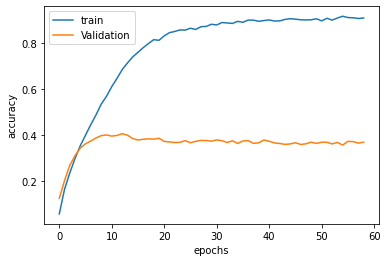

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()